In [18]:
import json
import matplotlib.pyplot as plt
import networkx as nx


In [19]:

with open('./models/full_model.json', 'r') as f:
    network = json.load(f)

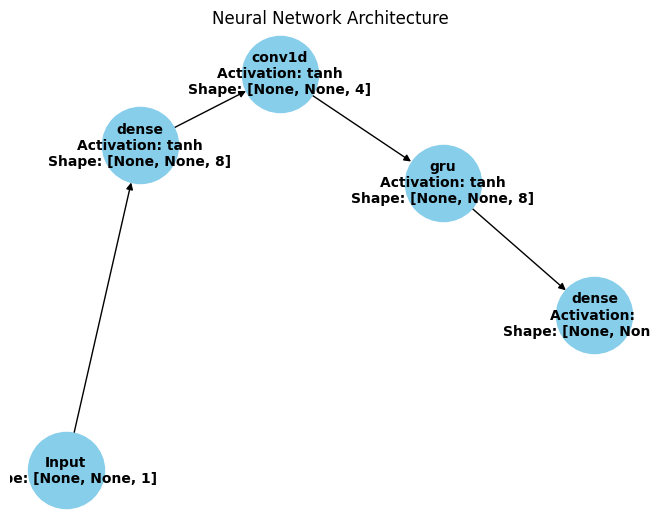

In [20]:
# Function to draw the network
def visualize_network(network):
    G = nx.DiGraph()

    # Add nodes with layer info as labels
    G.add_node("Input", label='Input\nShape: ' + str(network['in_shape']))
    for i, layer in enumerate(network['layers']):
        label = f"{layer['type']}\nActivation: {layer['activation']}\nShape: {layer['shape']}"
        G.add_node(f"Layer {i+1}", label=label)

    # Add edges
    G.add_edge("Input", "Layer 1")
    for i in range(1, len(network['layers'])):
        G.add_edge(f"Layer {i}", f"Layer {i+1}")

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the network
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title('Neural Network Architecture')
    plt.axis('off') # Hide the axes
    plt.show()


# Visualize the network
visualize_network(network)